# Brownian Motion Simulation
The first set of simulations involve a Brownian motion model for a diffusive medium without mass, whilst the second, the Langevin description, assumes mass and thus momentum for the particles.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as constant

In [2]:
class Brownian():
    
    def __init__(self,x0 = 0,time=100,time_step=1,steady_force=0,coeff_friction=1,temperature = 273,mass = 0.05):
        
        self.x0 = float(x0) # Starting position
        self.time = np.arange(0,time,time_step,dtype=float) # array of time values
        self.dt = time_step # time increment
        self.friction = coeff_friction # Coefficient of friction for system
        self.force = steady_force # Steady Force
        self.T = temperature # Temperature of system
        self.m = mass # mass of the particles
        self.D = constant.k*self.T/self.friction # Defining the diffusivity of system based on input parameters
        
#         assert (type(self.step) == int), 'time/time_step must be integer'
        assert (type(x0) == int or type(x0) == float or x0 is None),'x0 starting value must be a float or integer'
    
    def test(self):
        x = self.time
        x[0] = 25
        print(x[0])
        for i in range(1,len(self.time[:])):
            x[i] = x[i-1] + 1.1
            print(x[i])
            
    def simple_walk(self):        
        
        # copying numpy array for time as it has the same size as the desired array and is more efficient
        # Originally defined as self.time but this just created a pointer to the shared array self.time
        x = np.copy(self.time)
        thermal = np.copy(self.time)
        frictional = np.copy(self.time)
        # Defining values at t = 0
        x[0] = self.x0
        thermal[0] = 0
        
        # Frictional is constant but left as an array for future proofing if one wants to include variation in the parameter.
        frictional[0] = 0 #self.force*self.dt/self.friction
        
        # for each increment
        for i in range(1,len(self.time[:])):
            thermal[i] = (np.random.normal(0,scale=np.sqrt(1/12)))*(24*self.dt*self.D)**0.5
            frictional[i] = self.force*self.dt/self.friction
            x[i] = x[i-1] + thermal[i] + frictional[i]
        
        return self.time, x, thermal, frictional
    
    def langevin_walk(self,v0=0):
        
        x = np.copy(self.time)
        v = np.copy(self.time)
        frictional = np.copy(self.time)
        acceleration = np.copy(self.time)
        white_noise = np.copy(self.time)
        
        x[0] = self.x0
        v[0] = v0
        frictional[0] = -self.friction*v0
        acceleration[0] = self.force
        white_noise[0] = np.random.normal(0,scale=np.sqrt(1/12))*(24*constant.k*self.T*self.friction/self.dt)**0.5
        
        for i in range(1,len(self.time[:])):
            
            frictional[i] = -self.friction*v[i-1]
            
            acceleration[i] = self.force
            
            white_noise[i] = np.random.normal(0,scale=np.sqrt(1/12))*(24*constant.k*self.T*self.friction/self.dt)**0.5
            
            x[i] = x[i-1] + self.dt*v[i-1]
            v[i] = v[i-1] + (self.dt/self.m)*(frictional[i] + acceleration[i] + white_noise[i])
        
        
        return self.time, x, v, frictional, acceleration, white_noise
    
    def trend_and_bounds(self):
        x = self.time
        
        x = self.time*self.force+self.x0
        x_upper = self.time*self.force+(2*constant.k*self.T*self.time)**0.5+self.x0
        x_lower = self.time*self.force-(2*constant.k*self.T*self.time)**0.5+self.x0
        
        return x, x_upper, x_lower


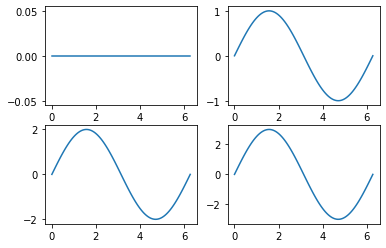

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2,2)

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

for i, ax in enumerate(axes.flat):
    ax.plot(x,y*i)

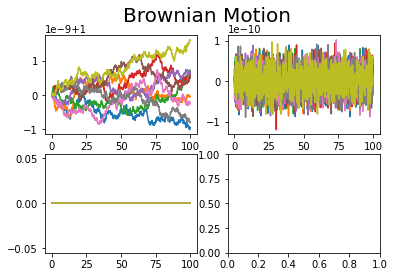

In [5]:
b = Brownian(x0 = 1,time=100,time_step=0.1,steady_force=0,coeff_friction=1,temperature = 273)


fig, axes = plt.subplots(2,2)
plt.rcParams["figure.figsize"] = (20,10)
plt.suptitle('Brownian Motion',fontsize=20)
plt.rcParams["figure.dpi"] = 100


for i in range(1,10):
    walk = b.simple_walk()
    
    for i in range(1,len(walk)):
        axes.flat[i-1].plot(walk[0],walk[i])
        


plt.show()

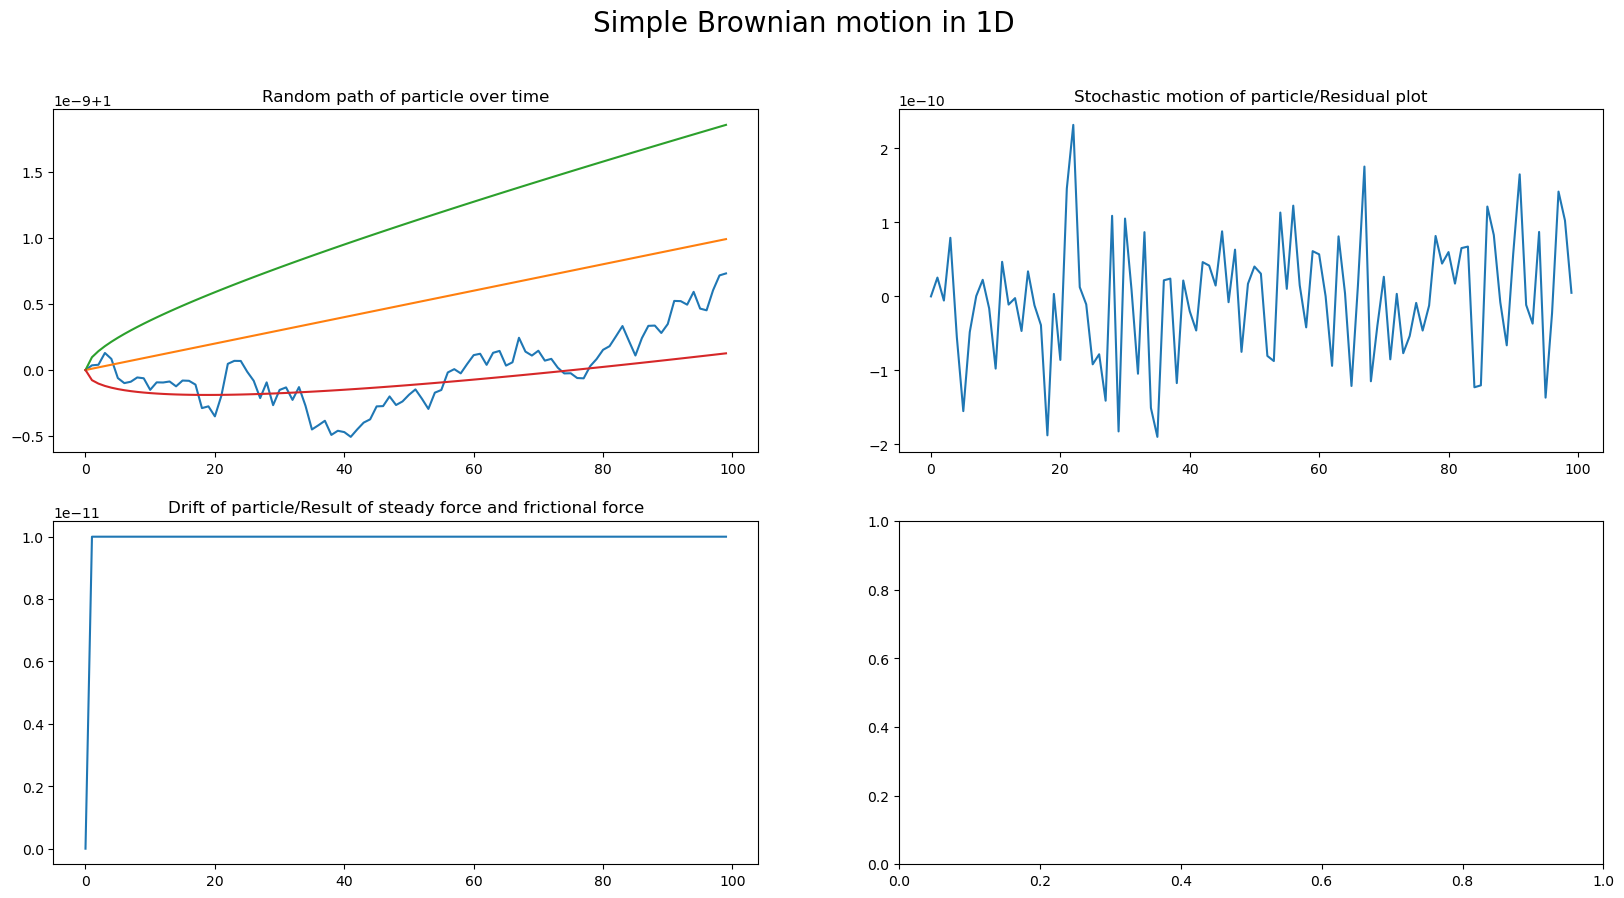

In [8]:
b = Brownian(x0 = 1,time=100,time_step=1,steady_force=1e-11,coeff_friction=1,temperature = 273)

titles = ['Random path of particle over time', 'Stochastic motion of particle/Residual plot', 'Drift of particle/Result of steady force and frictional force']

fig, axes = plt.subplots(2,2)
plt.rcParams["figure.figsize"] = (20,10)
plt.suptitle('Simple Brownian motion in 1D',fontsize=20)
plt.rcParams["figure.dpi"] = 100


for i in [1]:
    walk = b.simple_walk()
        
    for i in range(1,len(walk)):
        axes.flat[i-1].plot(walk[0],walk[i])
        axes.flat[i-1].title.set_text(titles[i-1])

        if i == 1:
            limits = b.trend_and_bounds()
            axes.flat[i-1].plot(walk[0], limits[0])
            axes.flat[i-1].plot(walk[0], limits[1])
            axes.flat[i-1].plot(walk[0], limits[2])
plt.show()

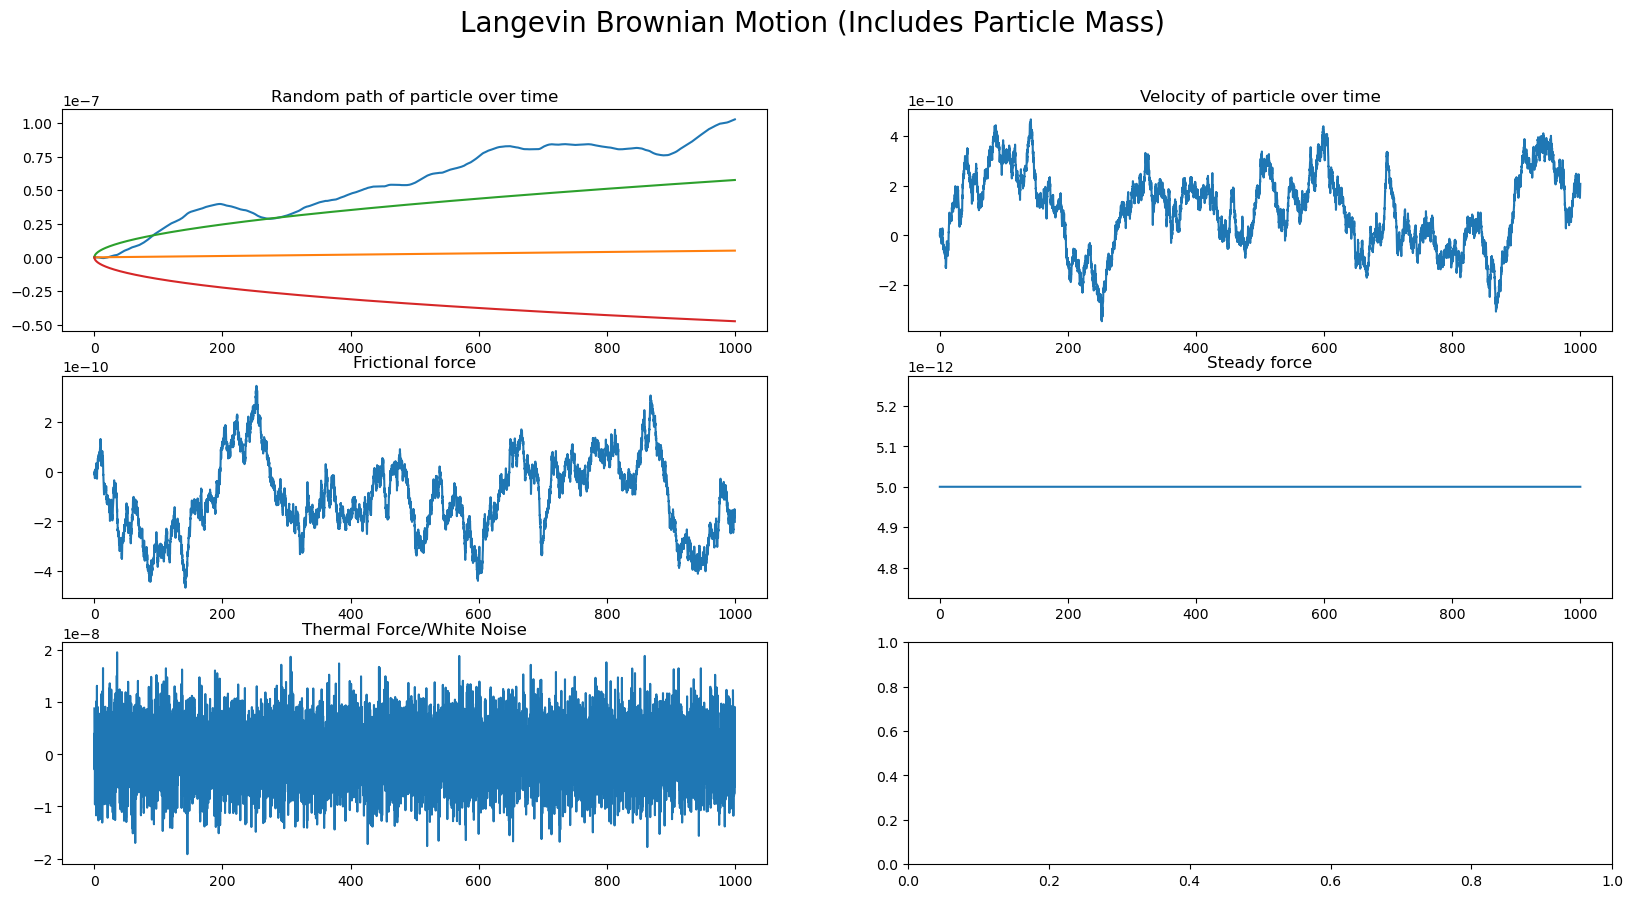

In [9]:
titles = ['Random path of particle over time','Velocity of particle over time', 'Frictional force', 'Steady force', 'Thermal Force/White Noise']
fig, axes = plt.subplots(3,2)
plt.rcParams["figure.figsize"] = (30,10)
plt.suptitle('Langevin Brownian Motion (Includes Particle Mass)',fontsize=20)
plt.rcParams["figure.dpi"] = 100

b = Brownian(x0 = 0,time=1000,time_step=0.1,steady_force=0.5e-11,coeff_friction=1,temperature = 100000,mass = 50)

for i in [1]:
    walk = b.langevin_walk(v0=0)
    
    for i in range(1,len(walk)):
        axes.flat[i-1].plot(walk[0],walk[i])
        axes.flat[i-1].title.set_text(titles[i-1])

        if i == 1:
            limits = b.trend_and_bounds()
            axes.flat[i-1].plot(walk[0], limits[0])
            axes.flat[i-1].plot(walk[0], limits[1])
            axes.flat[i-1].plot(walk[0], limits[2])
plt.show()